This script generates Democratic and Republican primary extra tree models, tested on both the 2018 senate and governor's primaries.

In [59]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(5)

In [60]:
#Read in data and filter out test data
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")
turnout_train_dem = pd.read_csv("turnout_train_dem.csv")


turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]
turnout_train_dem_use = turnout_train_dem[turnout_train_dem['Year'] != 2018]





Training
R^2:  1.0
Mean Absolute Error (MAE): 7.282014011911459e-15
Mean Squared Error (MSE): 1.9563719209987506e-28


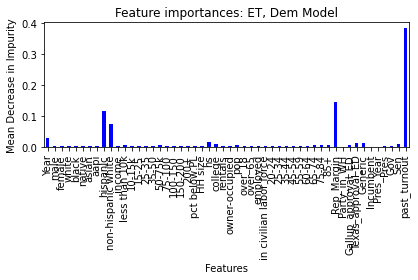

In [67]:

#Extra Trees: Dem model

turnout_train_dem_mod = turnout_train_dem_use

#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#Create model
et = ExtraTreesRegressor()
et.fit(model_feats, model_outcome);

#Make predictions
pred = et.predict(model_feats)

#Print Score
print("Training")

print("R^2: ",et.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = et.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'blue')
plt.title("Feature importances: ET, Dem Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()


In [62]:
np.random.seed(5)
#Test on 2018 Senate race
turnout_train_dem_mod = turnout_train_dem

#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Sen']


#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff', ], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#make predictions
pred = et.predict(model_feats)

#Print Score
print("Testing: Dem Sen 2018")

print("R^2: ",et.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))




Testing: Dem Sen 2018
R^2:  0.8175713954840247
Mean Absolute Error (MAE): 1.635072047244095
Mean Squared Error (MSE): 7.685987590984263
0.7921999999999998
44.480900000000055


In [63]:
np.random.seed(5)
#Test on 2018 Gov race
turnout_train_dem_mod = turnout_train_dem
#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Gov']
#Specify features and outcome
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_dem_mod['Turnout']

#make predictions
pred = et.predict(model_feats)

#Print Score
print("Testing: Dem Gov 2018")

print("R^2: ",et.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Dem Gov 2018
R^2:  0.7759696954754975
Mean Absolute Error (MAE): 1.7896153543307083
Mean Squared Error (MSE): 8.023553944291342


Training
R^2:  1.0
Mean Absolute Error (MAE): 1.9474787049841823e-14
Mean Squared Error (MSE): 6.950568890610737e-28


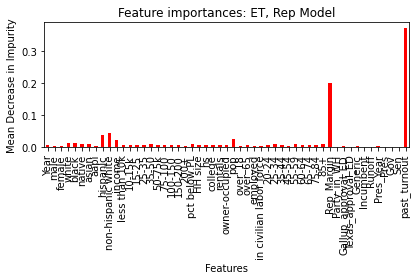

In [68]:
np.random.seed(5)
#Extra Trees: Rep model

turnout_train_rep_mod = turnout_train_rep_use


#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#Create model
et = ExtraTreesRegressor()
et.fit(model_feats, model_outcome);

#Make predictions
pred = et.predict(model_feats)

#Print Score
print("Training")

print("R^2: ",et.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = et.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: ET, Rep Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()


In [65]:
np.random.seed(5)
#Test on 2018 Senate race
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Sen']
#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#make predictions
pred = et.predict(model_feats)

#Print Score
print("Testing: Rep Sen 2018")

print("R^2: ",et.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Rep Sen 2018
R^2:  0.7208296755743155
Mean Absolute Error (MAE): 3.372729921259843
Mean Squared Error (MSE): 25.6231755348819


In [66]:
np.random.seed(5)
#Test on 2018 Gov race
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Gov']
#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']

#make predictions
pred = et.predict(model_feats)

#Print Score
print("Testing: Rep Gov 2018")

print("R^2: ",et.score(model_feats, model_outcome))

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Rep Gov 2018
R^2:  0.7323294207940522
Mean Absolute Error (MAE): 3.304575196850394
Mean Squared Error (MSE): 24.620167355708666
